In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from urllib.request import urlopen
import requests
import json
from pandas import json_normalize

In [3]:
# Reading the data into a dataframe and exclude first 4 rows that has information on data and columns
# and reading 12 relavant columns
ND=pd.read_excel("Nutrition-Facts.xlsx",sheet_name='SR Legacy and FNDDS',header=4,usecols = "A:K,DM")

In [4]:
# New Column names
new_cols = ['ID', 'ItemName', 'FoodGroup', 'CaloriesPer100Gms', 'FatinGms', 'ProteininGms','CarbsinGms','SugarsinGms','FiberinGms','CholesterolinGms','SaturatedFatsinGms','CalorieWeight_200']
# Renaming Column Names
ND.columns = new_cols
ND.fillna('', inplace=True)
ND1=ND.head(500)
ND1.head(5)

,ID,ItemName,FoodGroup,CaloriesPer100Gms,FatinGms,ProteininGms,CarbsinGms,SugarsinGms,FiberinGms,CholesterolinGms,SaturatedFatsinGms,CalorieWeight_200
0,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,0.0,3.25,60.606
1,167514,Kraft Foods Shake N Bake Original Recipe Coati...,Baked Foods,377.0,3.70,6.10,79.80,,,,,53.05
2,167515,George Weston Bakeries Thomas English Muffins,Baked Foods,232.0,1.80,8.00,46.00,,,,0.308,86.207
3,167516,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,273.0,9.22,6.58,41.05,4.3,2.2,15.0,1.898,73.26
4,167517,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,309.0,9.49,7.42,48.39,4.41,2.6,13.0,2.275,64.725


In [5]:
# Function to create a connection to sqlite
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

In [6]:
create_connection("pythonsqlite.db")

2.6.0


In [7]:
#Connecting to sqlite
conn = sqlite3.connect('pythonsqlite.db')

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Droping T_NUTRITION_EXCEL table if already exists.
cursor.execute("DROP TABLE IF EXISTS T_NUTRITION_EXCEL")

#Creating table as per requirement
sql ='''CREATE TABLE T_NUTRITION_EXCEL(
   Id text,
   ItemName text,
   FoodGroup text,
   CaloriesPer_100Gms REAL, 
   FatinGms REAL, 
   ProteininGms REAL,
   CarbsinGms REAL,
   SugarsinGms REAL,
   FiberinGms REAL,
   CholesterolinGms REAL,
   SaturatedFatsinGms REAL,
   CalorieWeight_200 REAL
)'''

cursor.execute(sql)
print("Table created successfully........")

Table created successfully........


In [8]:
# Convert DataFrame to sql
    
ND1.to_sql('T_NUTRITION_EXCEL', conn, if_exists='replace', index = False)

In [9]:
# Read from html
tables = pd.read_html('Table of food nutrients - Wikipedia.html')
dairy=tables[0]

In [10]:
# Define new columns
new_cols= ['ItemName','Quantity','InGrams','Calories','Protein','Carbs','Fiber','Fat','SaturatedFats']

In [11]:
# Replace headers with new columns
dairy.columns = new_cols
dairy.head()

,ItemName,Quantity,InGrams,Calories,Protein,Carbs,Fiber,Fat,SaturatedFats
0,"Cows' milk, whole",1 qt.,976.0,660.0,32.0,48,0.0,40,36
1,skim,1 qt.,984.0,360.0,36.0,52,0.0,t,t
2,"Buttermilk, cultured",1 cup,246.0,127.0,9.0,13,0.0,5,4
3,"Evaporated, undiluted",1 cup,252.0,345.0,16.0,24,0.0,20,18
4,Fortified milk,6 cups,1419.0,1373.0,89.0,119,1.4,42,23


In [12]:
# Loading HTML data into sql table
#Droping T_NUTRITION_HTML table if already exists.
cursor.execute("DROP TABLE IF EXISTS T_NUTRITION_HTML")

#Creating table as per requirement
sql ='''CREATE TABLE T_NUTRITION_HTML(
   ItemName text,
   Quantity text,
   InGrams text,
   Calories REAL, 
   Protein REAL,
   Carbs REAL,
   Fiber REAL,
   Fat REAL,
   SaturatedFats REAL
)'''

cursor.execute(sql)
print("Table created successfully........")

Table created successfully........


In [13]:
# Convert DataFrame to sql
dairy.to_sql('T_NUTRITION_HTML', conn, if_exists='replace', index = False)

In [14]:
# Load from API
Key="WEZlzcMzFyEo7Z6GpQ2Lo8ITQjmWgEywhZbvBhCc"
# get the API data
response = requests.get("https://api.nal.usda.gov/fdc/v1/foods/list?api_key="+Key)
data=response.json()
# Normalize a column that has json data (multi level json data)
foodNutrients = json_normalize(data=data, record_path='foodNutrients',meta=['foodCode', 'description','fdcId'],errors='ignore')
foodNutrients.head(5)

,number,name,amount,unitName,derivationCode,derivationDescription,foodCode,description,fdcId
0,203,Protein,2.5,G,NaN,NaN,91715300,100 GRAND Bar,1104067
1,204,Total lipid (fat),19.3,G,NaN,NaN,91715300,100 GRAND Bar,1104067
2,205,"Carbohydrate, by difference",71.0,G,NaN,NaN,91715300,100 GRAND Bar,1104067
3,208,Energy,468.0,KCAL,NaN,NaN,91715300,100 GRAND Bar,1104067
4,221,"Alcohol, ethyl",0.0,G,NaN,NaN,91715300,100 GRAND Bar,1104067


In [15]:
# Loading API data into sql table
#Droping T_NUTRITION_API table if already exists.
cursor.execute("DROP TABLE IF EXISTS T_NUTRITION_API")

#Creating table as per requirement
sql ='''CREATE TABLE T_NUTRITION_API(
   number text,
   name text,
   amount real,
   unitname REAL, 
   derivationcode REAL,
   derivationdescription REAL,
   foodcode text,
   description text,
   fdcid text
)'''

cursor.execute(sql)
print("Table created successfully........")

Table created successfully........


In [16]:
# Convert DataFrame to sql
foodNutrients.to_sql('T_NUTRITION_API', conn, if_exists='replace', index = False)

In [17]:
# Join all the three tables and read data into a dataframe
sql='''select * from T_NUTRITION_EXCEL e left join T_NUTRITION_HTML h
                                    on e.itemname=h.itemname
                                         left join T_NUTRITION_API a
                                    on h.itemname=a.name'''
df = pd.read_sql_query(sql, conn)
df.head()

,ID,ItemName,FoodGroup,CaloriesPer100Gms,FatinGms,ProteininGms,CarbsinGms,SugarsinGms,FiberinGms,CholesterolinGms,...,SaturatedFats,number,name,amount,unitName,derivationCode,derivationDescription,foodCode,description,fdcId
0,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,0.0,...,None,None,None,None,None,None,None,None,None,None
1,167514,Kraft Foods Shake N Bake Original Recipe Coati...,Baked Foods,377.0,3.70,6.10,79.80,,,,...,None,None,None,None,None,None,None,None,None,None
2,167515,George Weston Bakeries Thomas English Muffins,Baked Foods,232.0,1.80,8.00,46.00,,,,...,None,None,None,None,None,None,None,None,None,None
3,167516,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,273.0,9.22,6.58,41.05,4.3,2.2,15.0,...,None,None,None,None,None,None,None,None,None,None
4,167517,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,309.0,9.49,7.42,48.39,4.41,2.6,13.0,...,None,None,None,None,None,None,None,None,None,None


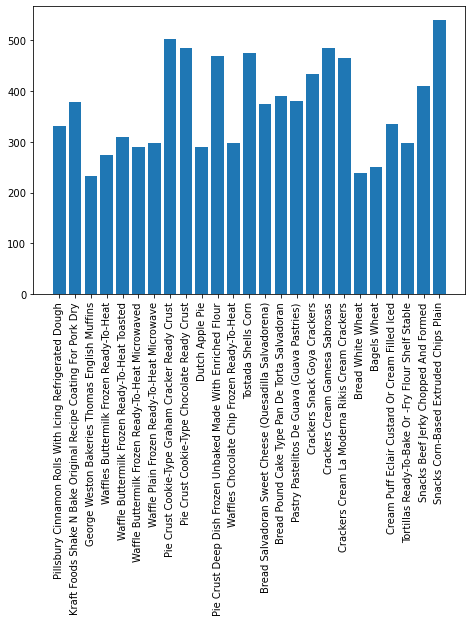

In [23]:
# Bar Chart
ND2=ND.head(25)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ND2['ItemName'],ND2['CaloriesPer100Gms'])
plt.xticks(rotation=90)
plt.show()

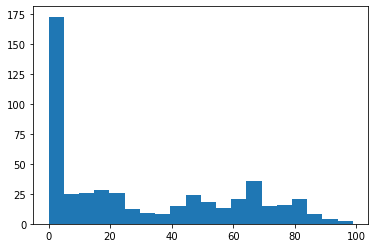

In [25]:
# Histogram to show carbs in grams distribution
plt.hist(ND1['CarbsinGms'],bins=20)
plt.show()

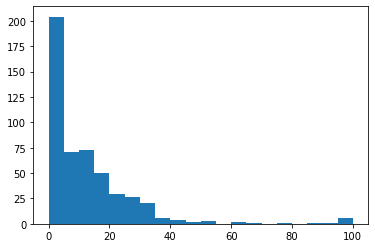

In [26]:
# Histogram to show fat in grams distribution
plt.hist(ND1['FatinGms'],bins=20)
plt.show()

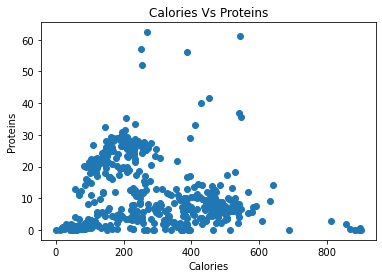

In [27]:
# Scatter plot to demonstrate Calories Vs Proteins
plt.scatter(ND1['CaloriesPer100Gms'],ND1['ProteininGms'])
plt.title('Calories Vs Proteins')
plt.xlabel('Calories')
plt.ylabel('Proteins')
plt.show()

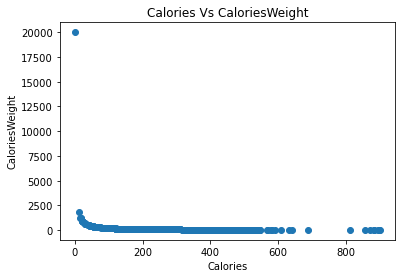

In [28]:
# Scatter plot to demonstrate Calories Vs Calorie Weight
plt.scatter(ND1['CaloriesPer100Gms'],ND1['CalorieWeight_200'])
plt.title('Calories Vs CaloriesWeight')
plt.xlabel('Calories')
plt.ylabel('CaloriesWeight')
plt.show()